# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lecture 10 (Logistic Regression)

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>


---

In [1]:
#from sklearn import datasets
import pandas as pd
%pylab inline
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_heart = pd.read_csv('data/Heart.csv')

In [3]:
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [14]:


df_heart['AHD'] = 1*(df_heart['AHD'] == "Yes")

df_heart.AHD.head(10)


0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: AHD, dtype: int64

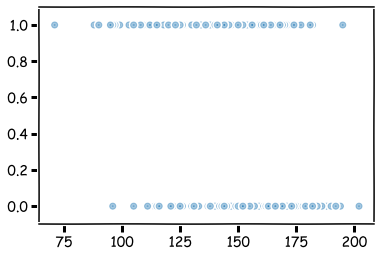

In [16]:
plt.plot(df_heart.MaxHR, df_heart.AHD, 'o', alpha=0.4)
plt.ylim(-0.1,1.1)
plt.show()
#uh-oh, that's not good :(

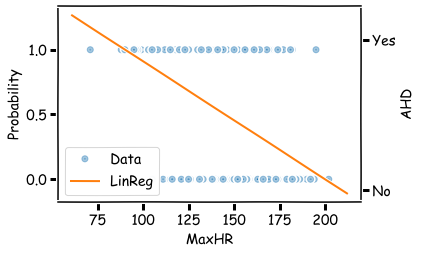

In [109]:

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("MaxHR")
host.set_ylabel("Probability")


par1.set_ylabel("AHD")

color1 = plt.cm.viridis(0)

data_x = df_heart['MaxHR']
data_y = df_heart['AHD']

regr = sk.linear_model.LinearRegression(fit_intercept=True)

regr.fit(data_x.values.reshape(-1,1), data_y)


# Make predictions using the testing set
x=np.linspace(np.min(data_x)-10,np.max(data_x)+10)
y_ = regr.predict(x.reshape(-1,1))

host.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
host.plot(x, y_, label='LinReg')
host.legend(loc=3)

labels = ['No', 'Yes']

# You can specify a rotation for the tick labels in degrees or with keywords.
par1.set_yticks( [0.061, 0.83])
par1.set_yticklabels(labels)

plt.show()

#plt.savefig('fig/FittingLR.png', dpi=300, transparent=True)

## Plot for linear regression -> Log Regression

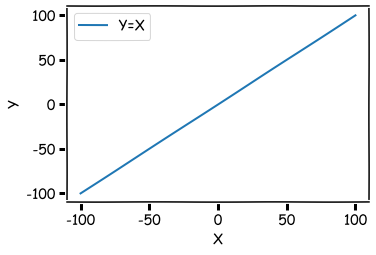

In [110]:
fig, ax1 = plt.subplots()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

x = np.linspace(-100, 100, 100)
y = x
yl = 1/(1+np.exp(-y))
ax1.plot(x,y, label='Y=X')



ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax1.legend()

#plt.savefig('fig/LinR.png', dpi=300, transparent=True)


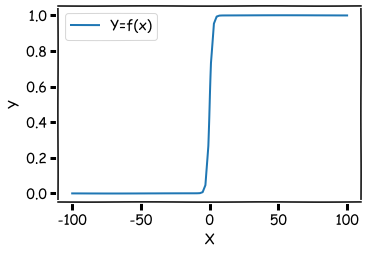

In [111]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


plt.plot(x,yl, label='Y=f(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
#plt.savefig('fig/LogR.png', dpi=300, transparent=True)


$\beta_0=$ -40


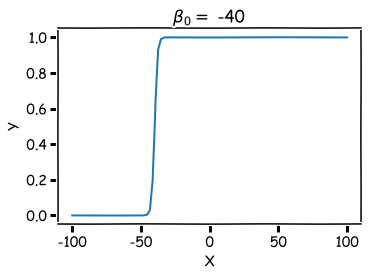

In [112]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
fig.patch.set_alpha(1.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)




line,  = ax.plot(x,yl, label=r'$Y=\frac{1}{1+e^{-(X+\beta_0) }}$')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend(loc=5)


def update(i):
    b0=2*i
    label = r'$\beta_0=$ {0}'.format(b0)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1+np.exp(-x+b0)))
    ax.set_title(label)
    return line, ax


# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(-20, 20,2), interval=300, blit=False)

#anim.save('fig/LogBeta0.gif', dpi=120, writer='imagemagick',  savefig_kwargs={'transparent': True, 'facecolor': '#F9F9F9'})



#plt.savefig('fig/LogRBeta.png', dpi=300, transparent=True)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


$\beta_1=$ 0.4
$\beta_1=$ 0.4
$\beta_1=$ 0.34
$\beta_1=$ 0.28
$\beta_1=$ 0.22
$\beta_1=$ 0.16
$\beta_1=$ 0.1
$\beta_1=$ 0.04
$\beta_1=$ -0.02
$\beta_1=$ -0.08
$\beta_1=$ -0.14
$\beta_1=$ -0.2
$\beta_1=$ -0.26
$\beta_1=$ -0.32
$\beta_1=$ -0.38
$\beta_1=$ 0.4


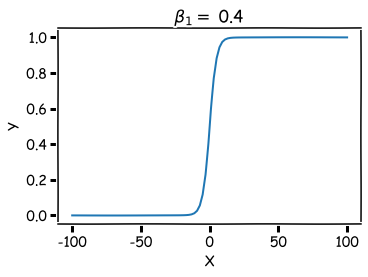

In [113]:
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
fig.patch.set_alpha(1.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)




line,  = ax.plot(x,yl, label=r'$Y=\frac{1}{1+e^{-(X+\beta_0) }}$')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend(loc=5)


def update(i):
    b1=2*i
    label = r'$\beta_1=$ {0}'.format(np.round(b1, decimals=2))
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata( 1/(1+np.exp(-b1*x)))
    ax.set_title(label)
    return line, ax


# FuncAnimation will call the 'update' function for each frame; here
# animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(.2, -.2,-.03), interval=200, blit=False)

anim.save('fig/LogBeta1.gif', dpi=120, writer='imagemagick',  savefig_kwargs={'transparent': True, 'facecolor': '#F9F9F9'})



#plt.savefig('fig/LogRBeta.png', dpi=300, transparent=True)

## Likelihood function 

No handles with labels found to put in legend.


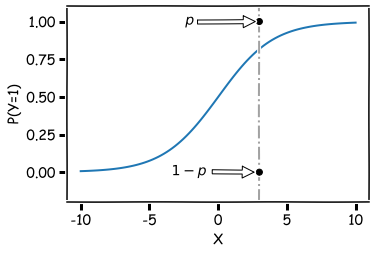

In [115]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x = np.linspace(-10, 10, 100)
y = x
yl = 1/(1+np.exp(-0.5*y))

#plt.plot(x,yl, label=r'$P(Y=1)=\frac{1}{1+e^{-X\beta}}$')
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.legend()
plt.ylim((-0.2, 1.1))
#plt.savefig('fig/Likelihood1.png', dpi=300, transparent=True)

### FRAME 2 

plt.axvline(x=3, color='#A2A2A2', ls='-.')
#plt.savefig('fig/Likelihood2.png', dpi=300, transparent=True)

### FRAME 3
plt.annotate(r'  $P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-8, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.savefig('fig/Likelihood3.png', dpi=300, transparent=True)

### FRAME 4

plt.annotate(r'  $p=P(y=1|x=3)$', xy=(3, .83),\
             xytext=(-10, .81),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.savefig('fig/Likelihood4.png', dpi=300, transparent=True)


### FRAME 5

plt.clf()
plt.ylim((-0.2, 1.1))
plt.plot(x,yl)
plt.xlabel('X')
plt.ylabel('P(Y=1)')
plt.axvline(x=3, color='#A2A2A2', ls='-.')
coinf = np.random.binomial(1, 0.7, size=1)
plt.plot( [3], [0], 'ko')
plt.plot( [3], [1], 'ko')

plt.annotate(r'  $p$', xy=(2.7, 1),\
             xytext=(-3, 0.98),
            arrowprops=dict(facecolor='white', shrink=0.0),
            )
plt.annotate(r'  $1-p$', xy=(2.8, .00),\
             xytext=(-4, -.02),
            arrowprops=dict(facecolor='white', shrink=0.05),
            )
plt.savefig('fig/Likelihood5.png', dpi=300, transparent=True)

plt.show()



## Plots for simple model 

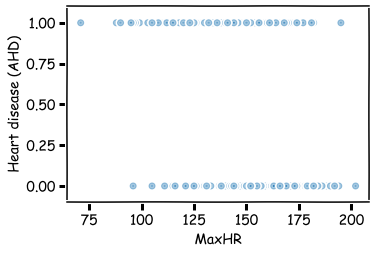

In [117]:
from sklearn import linear_model

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))


plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")




data_x = df_heart['MaxHR']
data_y = df_heart['AHD']

plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.show()

#plt.legend(loc=3)


#plt.savefig('fig/FittingLogR1.png', dpi=300, transparent=True)

In [118]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression(C=100000, fit_intercept=True,solver='lbfgs')
logreg.fit(data_x.values.reshape(-1,1), data_y);


print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.04341112]]
Estimated beta0: 
 [6.3249492]


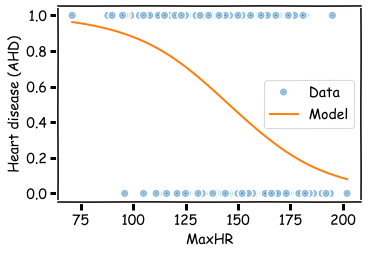

In [119]:

fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]
plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.plot(x,yhat, label='Model')
plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")



plt.savefig('fig/FittingLogR2.png', dpi=300, transparent=True)

## Categorical predictors

In [124]:
data_x = df_heart['Sex']
data_y = df_heart['AHD']

idx0 = np.where(data_x.values==0)
idx1 = np.where(data_x.values==1)

print("percentage of females with HD", data_y.values[idx0].sum()/idx0[0].shape)
print("percentage of males with HD", data_y.values[idx1].sum()/idx1[0].shape)

pd.crosstab(df_heart['Sex'],df_heart['AHD'])


percentage of females with HD [0.25773196]
percentage of males with HD [0.55339806]


AHD,0,1
Sex,,
0,72,25
1,92,114


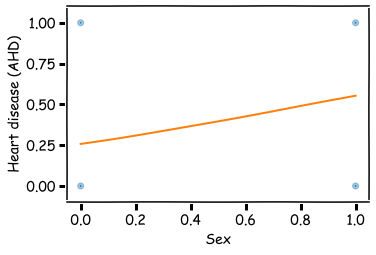

In [125]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)

plt.ylim((-0.1, 1.1))

plt.xlabel("Sex")
plt.ylabel("Heart disease (AHD)")


data_x = df_heart['Sex']
data_y = df_heart['AHD']
logreg.fit(data_x.values.reshape(-1,1), data_y);

x=np.linspace(np.min(data_x),np.max(data_x))
yhat = logreg.predict_proba(x.reshape(-1,1))[:,1]

plt.plot(data_x, data_y, 'o' ,alpha=0.4, label='Data')
plt.plot(x,yhat, label='Model')
plt.show()

In [126]:
print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[1.27219333]]
Estimated beta0: 
 [-1.0577853]


# Probit

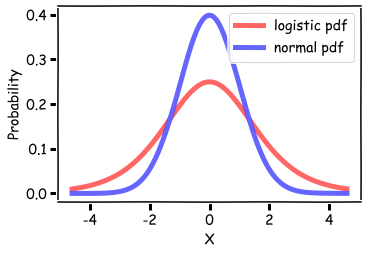

In [127]:
from scipy.stats import logistic
from scipy.stats import norm 
fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)



x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
plt.plot(x, logistic.pdf(x,loc=0, scale=1),   'r-', lw=5, alpha=0.6, label='logistic pdf')
plt.plot(x, norm.pdf(x,loc=0, scale=1),   'b-', lw=5, alpha=0.6, label='normal pdf')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()


plt.savefig('fig/NormVsLog.png', dpi=300, transparent=True)

## Multiple Logistic Regression

In [128]:
data_x = df_heart[['MaxHR','Sex']]
data_y = df_heart['AHD']

logreg.fit(data_x, data_y);


print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.04508908  1.40621576]]
Estimated beta0: 
 [5.60186105]


In [129]:
df_heart['Interaction'] = df_heart.MaxHR * df_heart.Sex 

data_x = df_heart[['MaxHR','Sex', 'Interaction']]
data_y = df_heart['AHD']

logreg = LogisticRegression(C=100000, fit_intercept=True, solver='lbfgs')
logreg.fit(data_x, data_y);


print('Estimated beta1, beta2, beta3: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2, beta3: 
 [[-0.02659135  5.41504863 -0.02707095]]
Estimated beta0: 
 [2.90189609]


## Multi-Class (Multinomial)

[2 2 2 0 2 0 2 0 2 2 0 2 2 0 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 2 2 0 0 2 2 0 2 0 2 2 2 0 2 2 0 0 2 2 2 2 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 0 0 2 0 0 2
 2 2 2 0 0 2 0 2 2 2 2 0 0 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 0 2 0 2 0
 2 0 0 2 2 2 2 2 0 2 2 0 0 2 0 2 0 0 0 2 2 0 0 2 0 2 2 0 0 2 0 2 2 2 2 2 2
 0 0 0 2 2 0 0 2 0 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 0 0 2 0 0 2 0 2 0 2 2 2
 0 0 0 0 0 0 2 2 2 1 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 1 2
 0 0 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2 0 2 0 2 0 0 2 0 0
 2 0 0 0 0 2 0]


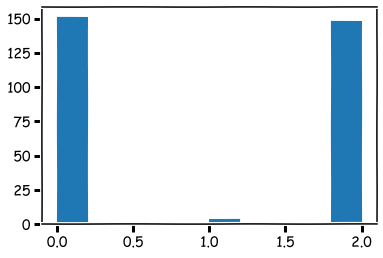

In [191]:
# Response for Multinomial Logistic Regression Example

print(df_heart.RestECG.values)
plt.hist(df_heart.RestECG.values)
plt.show()

In [186]:
# Multinomial Logistic Regression Example

data_x = df_heart[['Sex']]
data_y = df_heart['RestECG']

logitm = LogisticRegression(C = 10000000,solver='lbfgs')
logitm.fit(data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)



Estimated beta1: 
 [[-0.04003728]
 [-1.87833213]
 [ 0.1445807 ]]
Estimated beta0: 
 [ 0.02061932 -3.44468483 -0.14458062]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [187]:
logitm = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='ovr')
logitm.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[-0.04003728]
 [-1.87833213]
 [ 0.1445807 ]]
Estimated beta0: 
 [ 0.02061932 -3.44468483 -0.14458062]


In [188]:
logitm = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='multinomial')
logitm.fit (data_x, data_y)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 0.57896717]
 [-1.25284168]
 [ 0.67387452]]
Estimated beta0: 
 [ 0.95944398 -1.83373675  0.87429277]


In [189]:
logitm = LogisticRegression(C = 10000000,solver='lbfgs')
logitm.fit (df_heart[['Sex','MaxHR','Interaction']], df_heart['RestECG'])
# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 4.25808787e-01  1.07602095e-02 -2.95771639e-03]
 [-9.13968825e+00 -6.82088644e-02  5.38609369e-02]
 [ 5.16334353e-01 -4.34882213e-03 -2.63344224e-03]]
Estimated beta0: 
 [-1.60699206  5.89048174  0.5211584 ]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [169]:
print(logitm.predict(df_heart['Sex'].values.reshape(-1,1))[0:5])
print(logitm.predict_proba(df_heart['Sex'].values.reshape(-1,1))[0:5,])

[2 2 2 2 0]
[[0.49514565 0.00485434 0.50000001]
 [0.49514565 0.00485434 0.50000001]
 [0.49514565 0.00485434 0.50000001]
 [0.49514565 0.00485434 0.50000001]
 [0.5051546  0.03092776 0.46391764]]


## Regularization

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/

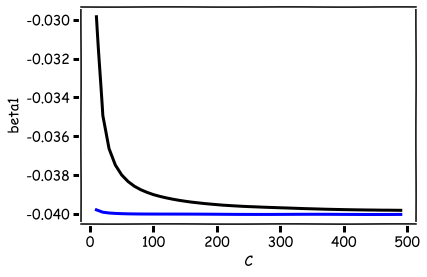

In [190]:
#Regularization Example

beta1_l1 = []
beta1_l2 = []
Cs = []

for i in range(1, 50):
    C = i*10
    logitm_l1 = LogisticRegression(C = C, penalty = "l1", solver='liblinear')
    logitm_l1.fit(data_x, data_y)
    logitm_l2 = LogisticRegression(C = C, penalty = "l2", solver='lbfgs')
    logitm_l2.fit (data_x, data_y)
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(Cs, beta1_l1,  color='black', lw=3)
plt.plot(Cs, beta1_l2,  color='blue', lw=3)
plt.xlabel ("C")
plt.ylabel("beta1")
plt.show()
